# CIS 4526 Sp24 HomeWork 3

### classifying weather by taking pictures

In [5]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [6]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [7]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network 

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [8]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [9]:
cloud_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'cloudy' in i]
rain_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'rain' in i]
sunrise_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'sunrise' in i]
sunshine_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'shine' in i]

In [10]:
cloud_set

['weather_data/cloudy126.jpg',
 'weather_data/cloudy132.jpg',
 'weather_data/cloudy23.jpg',
 'weather_data/cloudy37.jpg',
 'weather_data/cloudy250.jpg',
 'weather_data/cloudy244.jpg',
 'weather_data/cloudy278.jpg',
 'weather_data/cloudy293.jpg',
 'weather_data/cloudy287.jpg',
 'weather_data/cloudy286.jpg',
 'weather_data/cloudy292.jpg',
 'weather_data/cloudy279.jpg',
 'weather_data/cloudy245.jpg',
 'weather_data/cloudy251.jpg',
 'weather_data/cloudy36.jpg',
 'weather_data/cloudy22.jpg',
 'weather_data/cloudy133.jpg',
 'weather_data/cloudy127.jpg',
 'weather_data/cloudy131.jpg',
 'weather_data/cloudy125.jpg',
 'weather_data/cloudy119.jpg',
 'weather_data/cloudy34.jpg',
 'weather_data/cloudy20.jpg',
 'weather_data/cloudy247.jpg',
 'weather_data/cloudy253.jpg',
 'weather_data/cloudy284.jpg',
 'weather_data/cloudy290.jpg',
 'weather_data/cloudy9.jpg',
 'weather_data/cloudy291.jpg',
 'weather_data/cloudy8.jpg',
 'weather_data/cloudy285.jpg',
 'weather_data/cloudy252.jpg',
 'weather_data/clo

In [11]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [12]:
cloud_set

['weather_data/cloudy230.jpg',
 'weather_data/cloudy263.jpg',
 'weather_data/cloudy153.jpg',
 'weather_data/cloudy252.jpg',
 'weather_data/cloudy24.jpg',
 'weather_data/cloudy270.jpg',
 'weather_data/cloudy50.jpg',
 'weather_data/cloudy289.jpg',
 'weather_data/cloudy70.jpg',
 'weather_data/cloudy298.jpg',
 'weather_data/cloudy277.jpg',
 'weather_data/cloudy166.jpg',
 'weather_data/cloudy85.jpg',
 'weather_data/cloudy135.jpg',
 'weather_data/cloudy254.jpg',
 'weather_data/cloudy125.jpg',
 'weather_data/cloudy9.jpg',
 'weather_data/cloudy17.jpg',
 'weather_data/cloudy172.jpg',
 'weather_data/cloudy152.jpg',
 'weather_data/cloudy61.jpg',
 'weather_data/cloudy34.jpg',
 'weather_data/cloudy25.jpg',
 'weather_data/cloudy2.jpg',
 'weather_data/cloudy215.jpg',
 'weather_data/cloudy291.jpg',
 'weather_data/cloudy51.jpg',
 'weather_data/cloudy35.jpg',
 'weather_data/cloudy279.jpg',
 'weather_data/cloudy81.jpg',
 'weather_data/cloudy284.jpg',
 'weather_data/cloudy280.jpg',
 'weather_data/cloudy40

In [13]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[150:] + sunshine_set[150:]

In [14]:
train_set

['weather_data/cloudy230.jpg',
 'weather_data/cloudy263.jpg',
 'weather_data/cloudy153.jpg',
 'weather_data/cloudy252.jpg',
 'weather_data/cloudy24.jpg',
 'weather_data/cloudy270.jpg',
 'weather_data/cloudy50.jpg',
 'weather_data/cloudy289.jpg',
 'weather_data/cloudy70.jpg',
 'weather_data/cloudy298.jpg',
 'weather_data/cloudy277.jpg',
 'weather_data/cloudy166.jpg',
 'weather_data/cloudy85.jpg',
 'weather_data/cloudy135.jpg',
 'weather_data/cloudy254.jpg',
 'weather_data/cloudy125.jpg',
 'weather_data/cloudy9.jpg',
 'weather_data/cloudy17.jpg',
 'weather_data/cloudy172.jpg',
 'weather_data/cloudy152.jpg',
 'weather_data/cloudy61.jpg',
 'weather_data/cloudy34.jpg',
 'weather_data/cloudy25.jpg',
 'weather_data/cloudy2.jpg',
 'weather_data/cloudy215.jpg',
 'weather_data/cloudy291.jpg',
 'weather_data/cloudy51.jpg',
 'weather_data/cloudy35.jpg',
 'weather_data/cloudy279.jpg',
 'weather_data/cloudy81.jpg',
 'weather_data/cloudy284.jpg',
 'weather_data/cloudy280.jpg',
 'weather_data/cloudy40

In [15]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

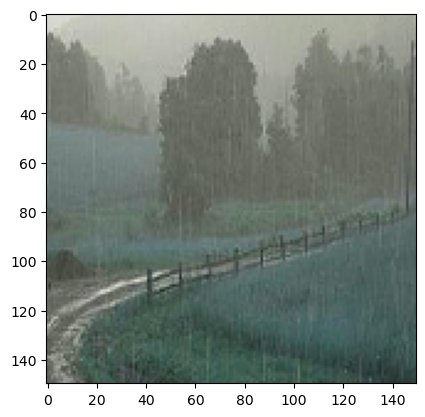

In [16]:
# Display some images
idx = 200
image = train_set[idx]
#image = "data/weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

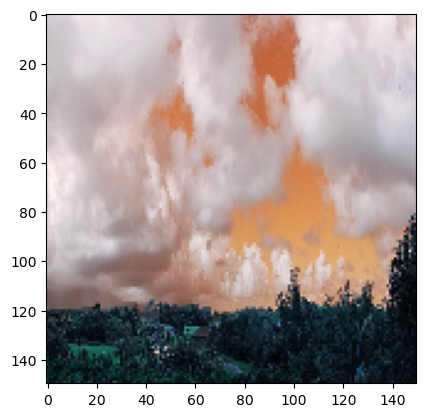

In [17]:
# Display some images
idx = 13
image = train_set[idx]
#image = "data/weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
print(y)

In [18]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

Failed to format:  weather_data/shine131.jpg


In [19]:
X_train[1].shape

(150, 150, 3)

<Axes: ylabel='count'>

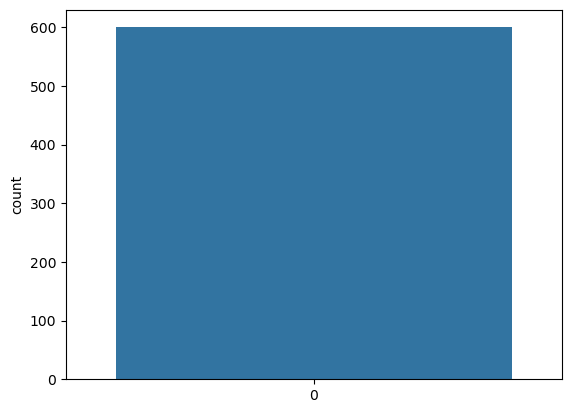

In [20]:
sns.countplot(y_train)

In [21]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
def check_zero(arr):
    for i in range(len(arr)):
        if arr[i][0] == 0:
            return True
    return False
check_zero(y_train)

True

[0. 1. 0. 0. 0.]


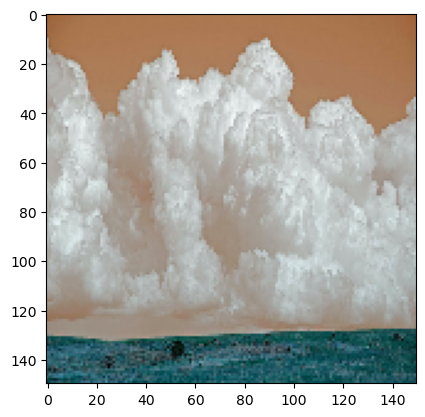

In [23]:
# display some X_test, y_test
idx = 1
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [86]:
# Define your model here
from keras.models import Sequential, Model
from keras import layers

Model = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])
# ...
# 13.) Model Summary
print(Model.summary())


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 124)  │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 124)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        71,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,183,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,877 (4.91 MB)

 Trainable params: 1,285,877 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

None


In [87]:
# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

In [88]:
# 14.) Compile and Train the Model
Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = Model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=500)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2354 - loss: 21.6542 - val_accuracy: 0.2371 - val_loss: 1.6086
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.2832 - loss: 1.6105 - val_accuracy: 0.3767 - val_loss: 1.4655
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3643 - loss: 1.5608 - val_accuracy: 0.2983 - val_loss: 1.5613
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.3041 - loss: 1.5598 - val_accuracy: 0.3231 - val_loss: 1.5367
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2518 - loss: 1.5509 - val_accuracy: 0.3920 - val_loss: 1.4504
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.2403 - loss: 1.5364 - val_accuracy: 0.3996 - val_loss: 1.3946
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.2729 - loss: 1.4945 - val_accuracy: 0.3614 - val_loss: 1.4428
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.2696 - loss: 1.5285 - val_accuracy: 0.3595 - val_loss

In [43]:
history.history

{'accuracy': [0.2783333361148834,
  0.41999998688697815,
  0.5550000071525574,
  0.7166666388511658,
  0.846666693687439,
  0.8833333253860474,
  0.9133333563804626,
  0.9166666865348816,
  0.9433333277702332,
  0.9683333039283752],
 'loss': [68.37325286865234,
  1.618777871131897,
  1.0701698064804077,
  0.7214895486831665,
  0.4545300602912903,
  0.3338196575641632,
  0.3004613518714905,
  0.24275068938732147,
  0.1917005479335785,
  0.09569070488214493],
 'val_accuracy': [0.24665391445159912,
  0.533460795879364,
  0.6156787872314453,
  0.6998087763786316,
  0.7476099133491516,
  0.6137667298316956,
  0.7151051759719849,
  0.6462715268135071,
  0.6864244937896729,
  0.7323135733604431],
 'val_loss': [3.5358235836029053,
  1.3330597877502441,
  1.0398643016815186,
  0.9595506191253662,
  1.0118705034255981,
  1.5306494235992432,
  1.0617468357086182,
  1.3108713626861572,
  1.7297793626785278,
  1.322275996208191]}

### Plot learning Curves

***Type your code here***

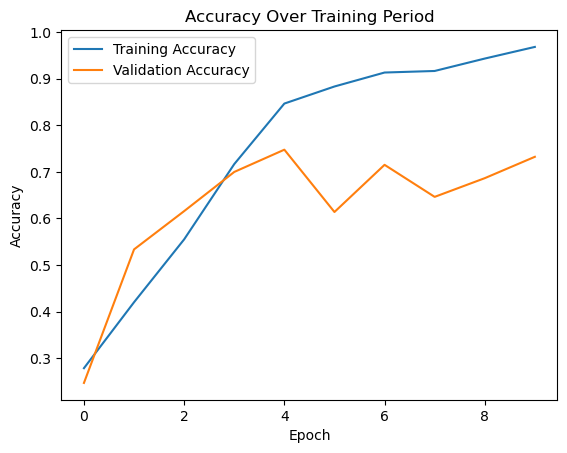

In [85]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.plot(history.history['loss'],label='Loss')
# plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Training Period')
plt.legend()
plt.show()

### Evaluating the model out-of-sample

In [45]:
# Type your code here
test_loss, test_acc = Model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.6441 - loss: 1.4671
Test accuracy: 0.732


### Comment on your results

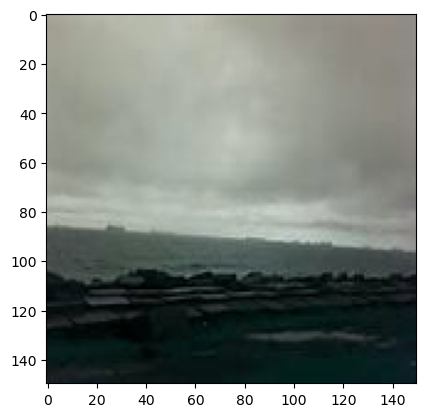

In [76]:
# Display some images
idx = 1
image = train_set[idx]
# image = "weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [77]:
import numpy as np
from PIL import Image
image = Image.open(image).resize((150, 150))  # Resize the image to 150x150 pixels
image = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
image = np.expand_dims(image, axis=0)

In [78]:
predicted_probabilities = Model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [79]:
predicted_probabilities

array([[0.15959291, 0.22784506, 0.21435197, 0.18131337, 0.21689664]],
      dtype=float32)

In [80]:
predicted_class = np.argmax(predicted_probabilities)
print(f"Predicted class: {predicted_class}")

Predicted class: 1
